In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def read_csv(file_loc: str) -> pd.DataFrame:
    return pd.read_csv(file_loc, true_values=["resolved"], false_values=["floor"], na_values=[''])

df = pd.concat([read_csv("file_3_Mar18_Output_1.csv"), read_csv("file_3_Mar18_Output_1.csv")], ignore_index=True)

In [22]:
df["account_open_date_13_march"] = pd.to_datetime(df["account_open_date_13_march"])
df["account_open_date_18_march"] = pd.to_datetime(df["account_open_date_18_march"])


df["delinquency_history_13_march_present"] = df["delinquency_history_13_march"].str.get(1).astype(int)
df["delinquency_history_13_march_past"] = df["delinquency_history_13_march"].str.get(2).astype(int)
df["delinquency_history_18_march_present"] = df["delinquency_history_18_march"].str.get(1).astype(int)
df["delinquency_history_18_march_past"] = df["delinquency_history_18_march"].str.get(2).astype(int)
df["ebill_enrolled_status_18_march"] =  df["ebill_enrolled_status_18_march"].fillna("NA").replace(r"^\s*$", "NA", regex=True)
df["ebill_enrolled_status_13_march"] =  df["ebill_enrolled_status_13_march"].fillna("NA").replace(r"^\s*$", "NA", regex=True)
df["account_status_18_march"] =  df["account_status_18_march"].fillna("NA").replace(r"^\s*$", "NA", regex=True)
df["account_status_13_march"] =  df["account_status_13_march"].fillna("NA").replace(r"^\s*$", "NA", regex=True)
df["card_activation_status_13_march"] = df["card_activation_status_13_march"].replace(r"^\s*$", -1, regex=True)
df["card_activation_status_18_march"] = df["card_activation_status_18_march"].replace(r"^\s*$", -1, regex=True)

df = df.drop(["delinquency_history_13_march", "delinquency_history_18_march", "serial"], axis=1)
df

,timestamp_call_key,retailer_code,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,account_open_date_13_march,account_status_13_march,card_activation_status_13_march,...,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,delinquency_history_13_march_present,delinquency_history_13_march_past,delinquency_history_18_march_present,delinquency_history_18_march_past
0,240315173250 DAL1OA3M,D,PP,IA PP TR,True,1.0,NaN,2013-05-19,NA,0,...,2013-05-19,NA,0,1,E,0,0,0,0,0
1,240315124742 DAL15XHK,E,BA,IA BA TS nl TR,False,2.0,143.28,2003-09-22,NA,0,...,2003-09-22,NA,0,1,E,0,0,0,0,0
2,240317114237 DAL3BLK6,J,PT,IA AA BA MR nl PT TR,True,12.0,0.00,2017-09-04,NA,8,...,2017-09-04,NA,8,0,NA,0,0,0,0,0
3,240314120849 PHX6PL4U,E,BA,IA BA,True,2.0,44.98,2024-02-07,NA,0,...,2024-02-07,NA,0,0,L,0,0,0,0,0
4,240314145902 DAL68RYS,I,BA,IA BA TS nl mm TR,False,6.0,7.00,2022-01-02,NA,0,...,2022-01-02,NA,0,1,NA,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809261,240315165941 PHX67C7R,E,PT,IA BA nl PT TR,True,6.0,4431.60,2007-02-11,E,0,...,2007-02-11,E,0,0,NA,0,0,6,0,6
1809262,240315180137 PHX2GWK4,B,BA,IA PP BA,True,3.0,100.54,2022-11-17,NA,0,...,2022-11-17,NA,0,1,E,0,0,0,0,0
1809263,240314142306 DAL33PKW,E,BA,IA BA,True,2.0,2504.35,2023-08-27,NA,0,...,2023-08-27,NA,0,0,L,0,0,0,0,0
1809264,240314141352 DAL64P9X,F,PP,IA IA PP TR,True,5.0,2934.35,2022-07-11,NA,0,...,2022-07-11,NA,0,0,NA,0,0,0,0,0


In [3]:
df.info()
df.ebill_enrolled_status_18_march.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809266 entries, 0 to 1809265
Data columns (total 25 columns):
 #   Column                                Dtype         
---  ------                                -----         
 0   timestamp_call_key                    object        
 1   retailer_code                         object        
 2   reason                                object        
 3   mos                                   object        
 4   resolved                              bool          
 5   no_of_accounts_with_syf_13_march      float64       
 6   account_balance_13_march              float64       
 7   account_open_date_13_march            datetime64[ns]
 8   account_status_13_march               object        
 9   card_activation_status_13_march       object        
 10  eservice_ind_13_march                 int64         
 11  ebill_enrolled_status_13_march        object        
 12  auto_pay_enrolled_status_13_march     int64         
 13  no_of_accoun

ebill_enrolled_status_18_march
NA    791400
L     557842
E     434552
B      22980
D       2492
Name: count, dtype: int64

In [4]:
df.dropna().describe()

,no_of_accounts_with_syf_13_march,account_balance_13_march,account_open_date_13_march,eservice_ind_13_march,auto_pay_enrolled_status_13_march,no_of_accounts_with_syf_18_march,account_balance_18_march,account_open_date_18_march,eservice_ind_18_march,auto_pay_enrolled_status_18_march,delinquency_history_13_march_present,delinquency_history_13_march_past,delinquency_history_18_march_present,delinquency_history_18_march_past
count,1.669806e+06,1.669806e+06,1669806,1.669806e+06,1.669806e+06,1.669806e+06,1.669806e+06,1669806,1.669806e+06,1.669806e+06,1.669806e+06,1.669806e+06,1.669806e+06,1.669806e+06
mean,5.099463e+00,1.177640e+03,2018-08-21 15:37:08.719265024,4.276377e-01,1.589406e-02,5.109123e+00,1.181172e+03,2018-08-21 15:37:08.719265024,4.315783e-01,1.602821e-02,9.889053e-02,9.001884e-02,9.845575e-02,9.204303e-02
min,1.000000e+00,-2.302494e+04,1956-01-01 00:00:00,0.000000e+00,0.000000e+00,1.000000e+00,-2.302494e+04,1956-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.141600e+02,2016-07-21 00:00:00,0.000000e+00,0.000000e+00,2.000000e+00,1.152700e+02,2016-07-21 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,4.660800e+02,2020-07-30 00:00:00,0.000000e+00,0.000000e+00,4.000000e+00,4.678200e+02,2020-07-30 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.000000e+00,1.478030e+03,2022-09-18 00:00:00,1.000000e+00,0.000000e+00,7.000000e+00,1.483247e+03,2022-09-18 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.210000e+02,4.000043e+04,2024-03-11 00:00:00,1.000000e+00,1.000000e+00,1.210000e+02,4.000043e+04,2024-03-11 00:00:00,1.000000e+00,1.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
std,3.609405e+00,1.794959e+03,NaN,4.947361e-01,1.250658e-01,3.613249e+00,1.800826e+03,NaN,4.952965e-01,1.255839e-01,4.755070e-01,4.656726e-01,4.713918e-01,4.698621e-01


In [5]:
agg = df.groupby(["resolved"])
agg.groups


{False: [1, 4, 5, 10, 17, 18, 23, 29, 37, 38, 42, 44, 57, 62, 71, 92, 105, 119, 129, 138, 142, 143, 147, 154, 155, 160, 165, 168, 176, 178, 194, 196, 198, 200, 202, 203, 223, 232, 235, 240, 242, 243, 244, 247, 256, 261, 267, 276, 283, 284, 290, 291, 302, 305, 324, 326, 327, 330, 332, 348, 350, 356, 358, 360, 361, 380, 386, 396, 397, 398, 405, 406, 408, 409, 436, 439, 440, 441, 443, 447, 450, 453, 455, 459, 460, 468, 476, 481, 482, 487, 491, 495, 509, 513, 516, 538, 541, 542, 560, 561, ...], True: [0, 2, 3, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, ...]}

In [6]:
agg_mean = agg.mean(numeric_only=True)
agg_mean

,no_of_accounts_with_syf_13_march,account_balance_13_march,eservice_ind_13_march,auto_pay_enrolled_status_13_march,no_of_accounts_with_syf_18_march,account_balance_18_march,eservice_ind_18_march,auto_pay_enrolled_status_18_march,delinquency_history_13_march_present,delinquency_history_13_march_past,delinquency_history_18_march_present,delinquency_history_18_march_past
resolved,,,,,,,,,,,,
False,5.038822,1072.813477,0.534838,0.025581,5.068230,1073.016551,0.547985,0.025982,0.147994,0.112192,0.154707,0.113730
True,5.121691,1201.706999,0.402626,0.013597,5.127247,1202.863276,0.405509,0.013672,0.086297,0.083538,0.084214,0.085556


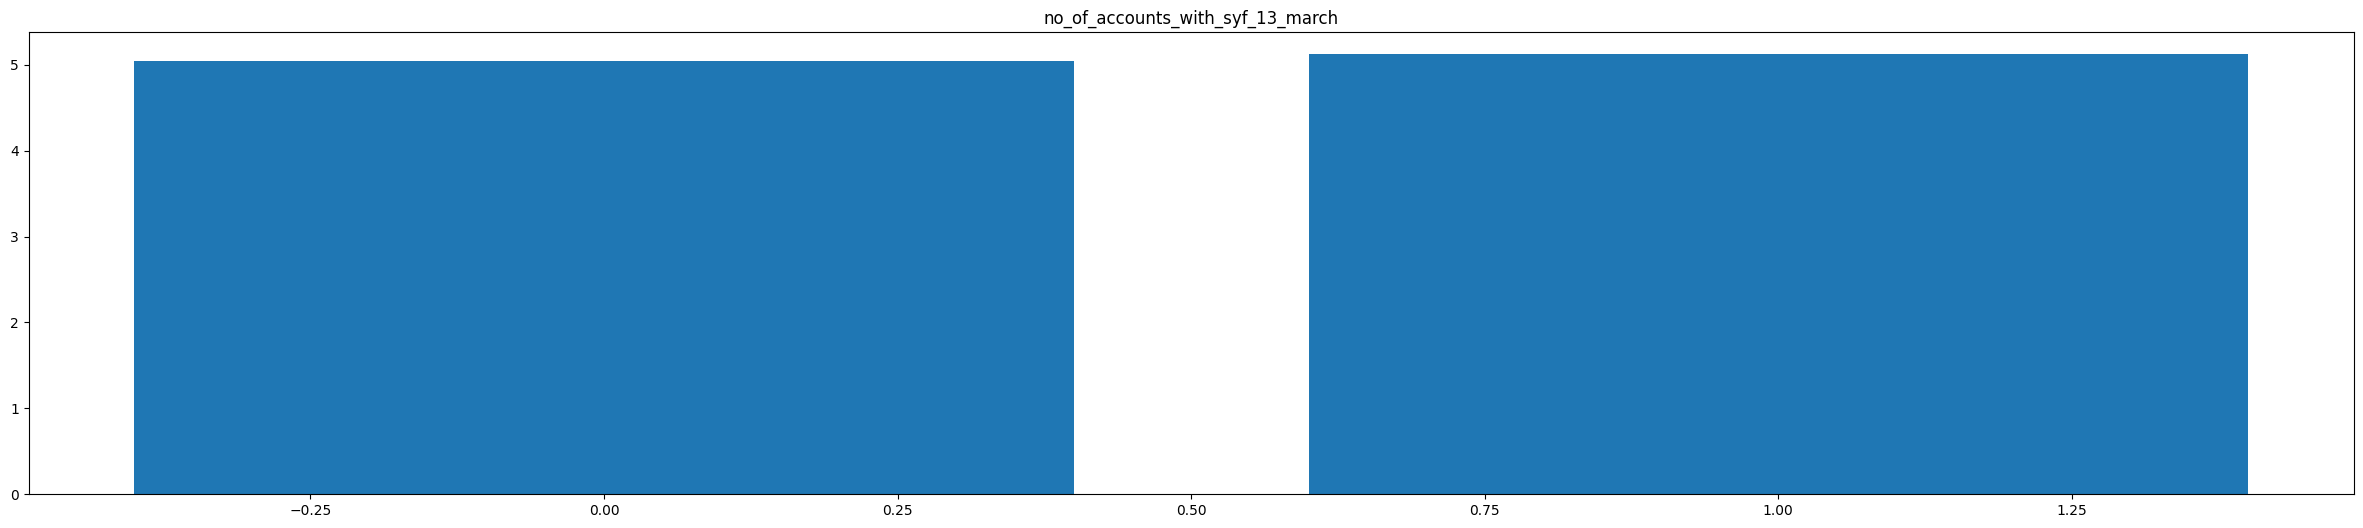

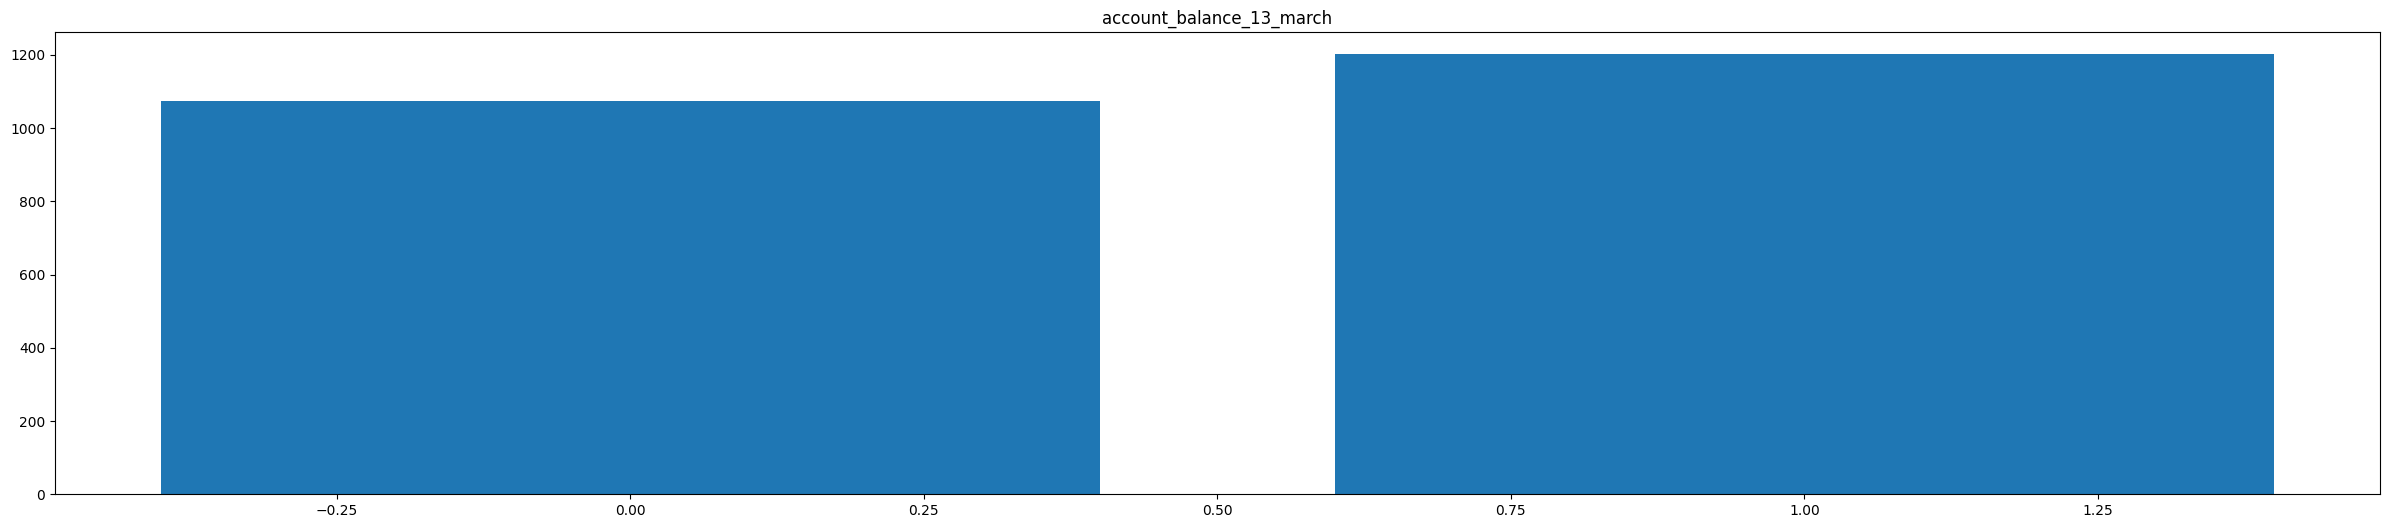

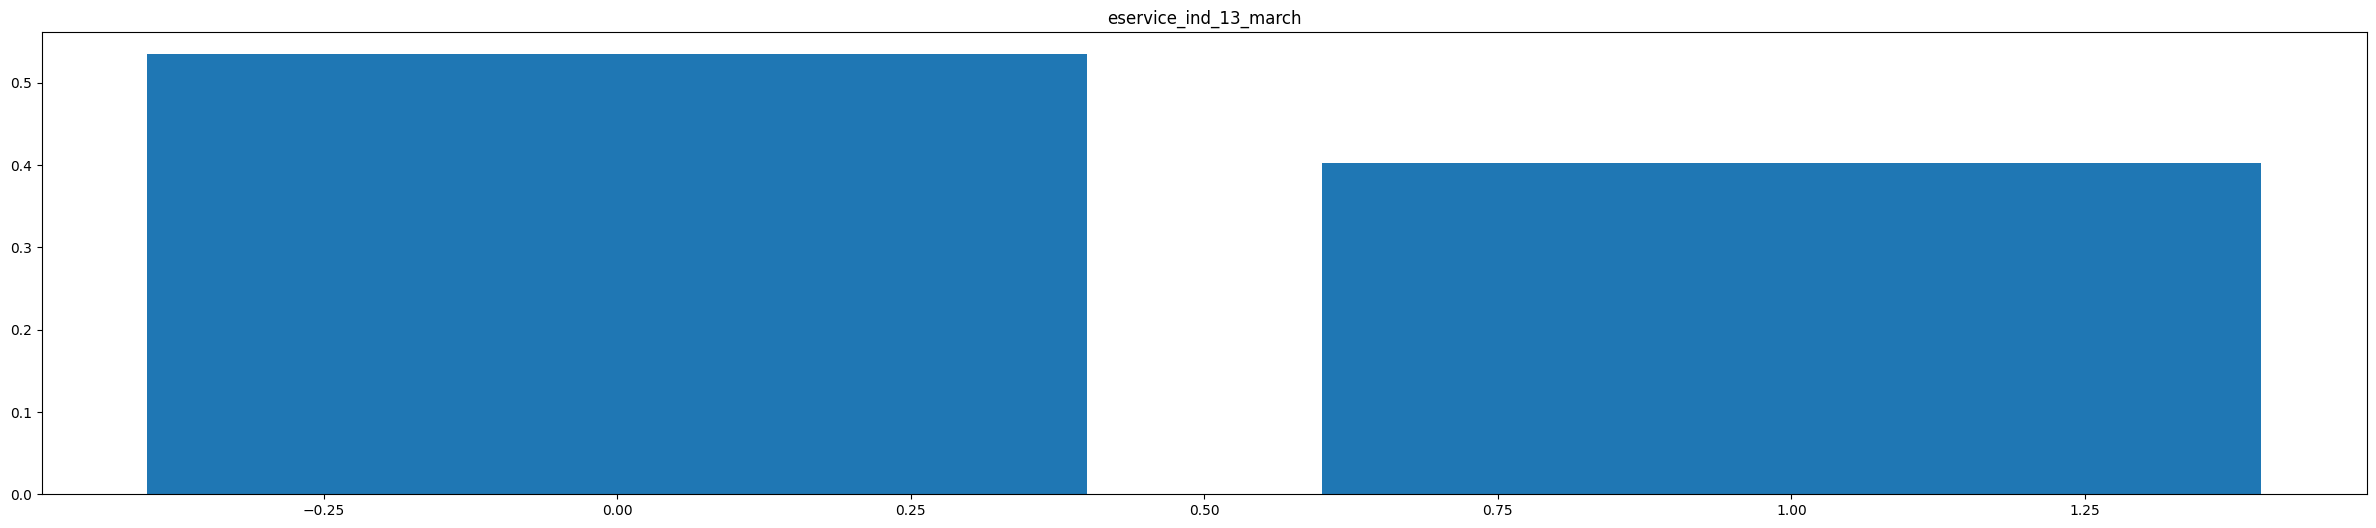

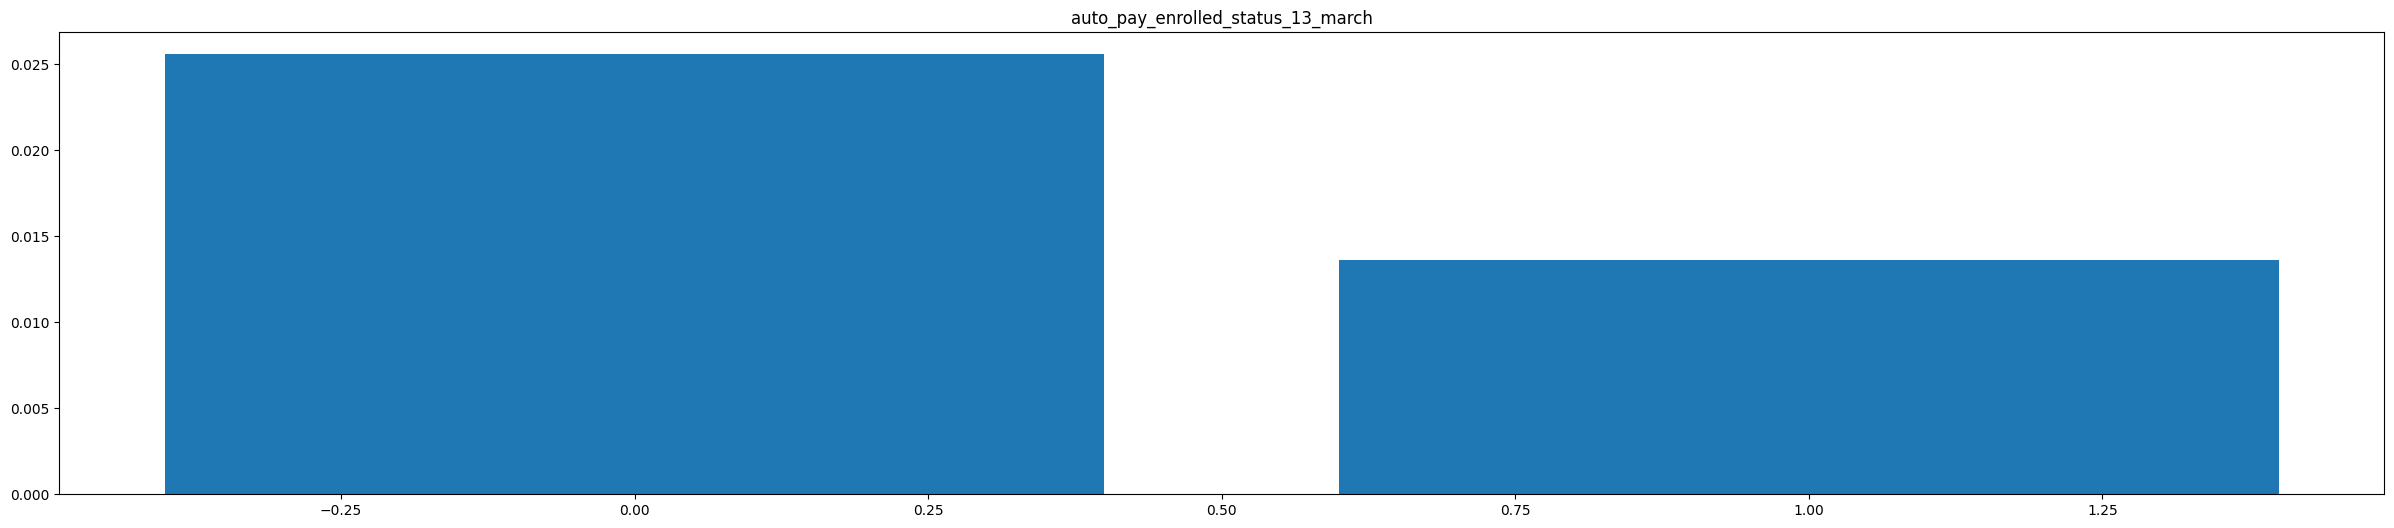

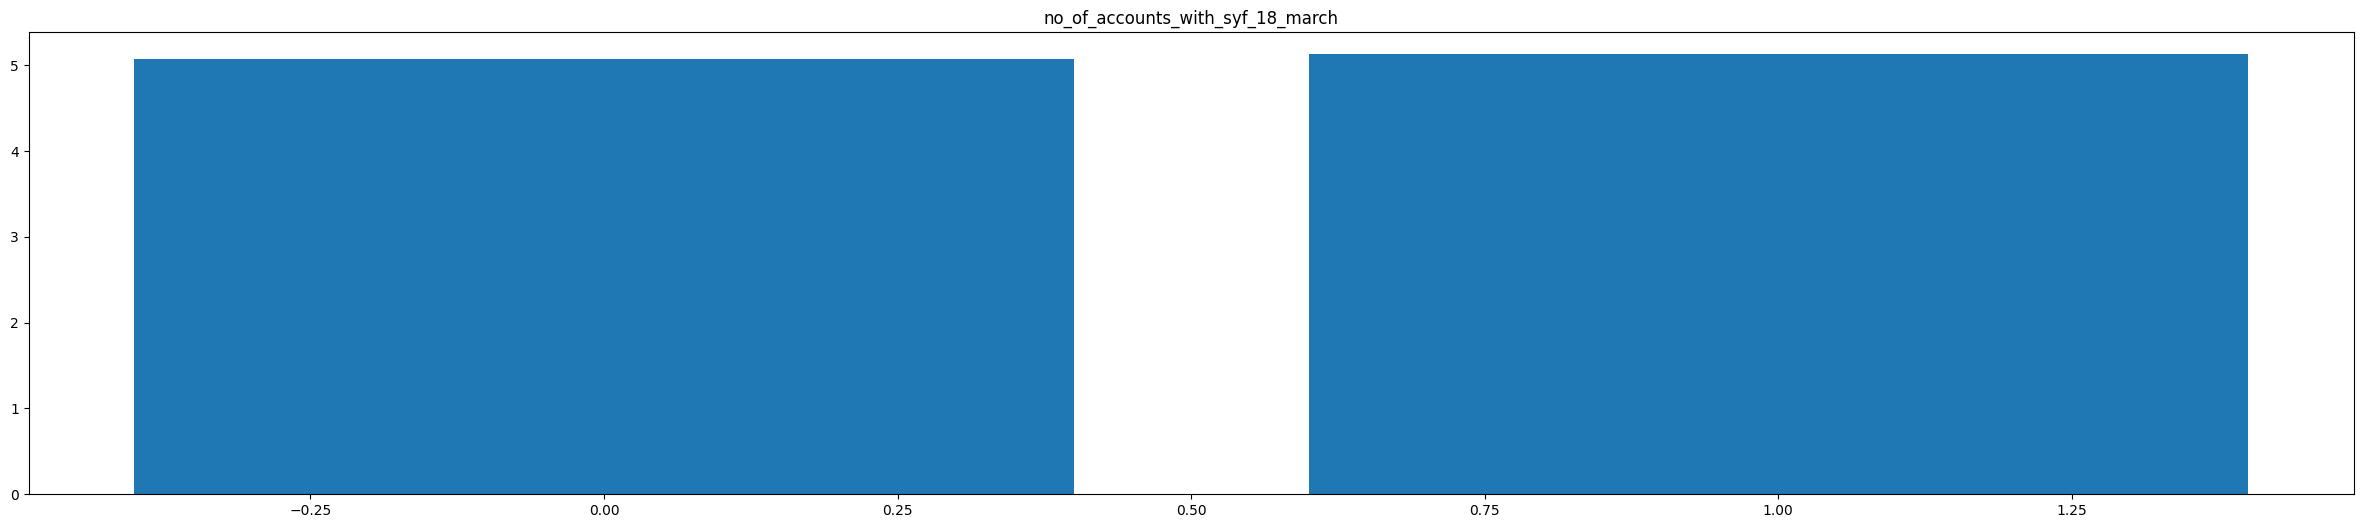

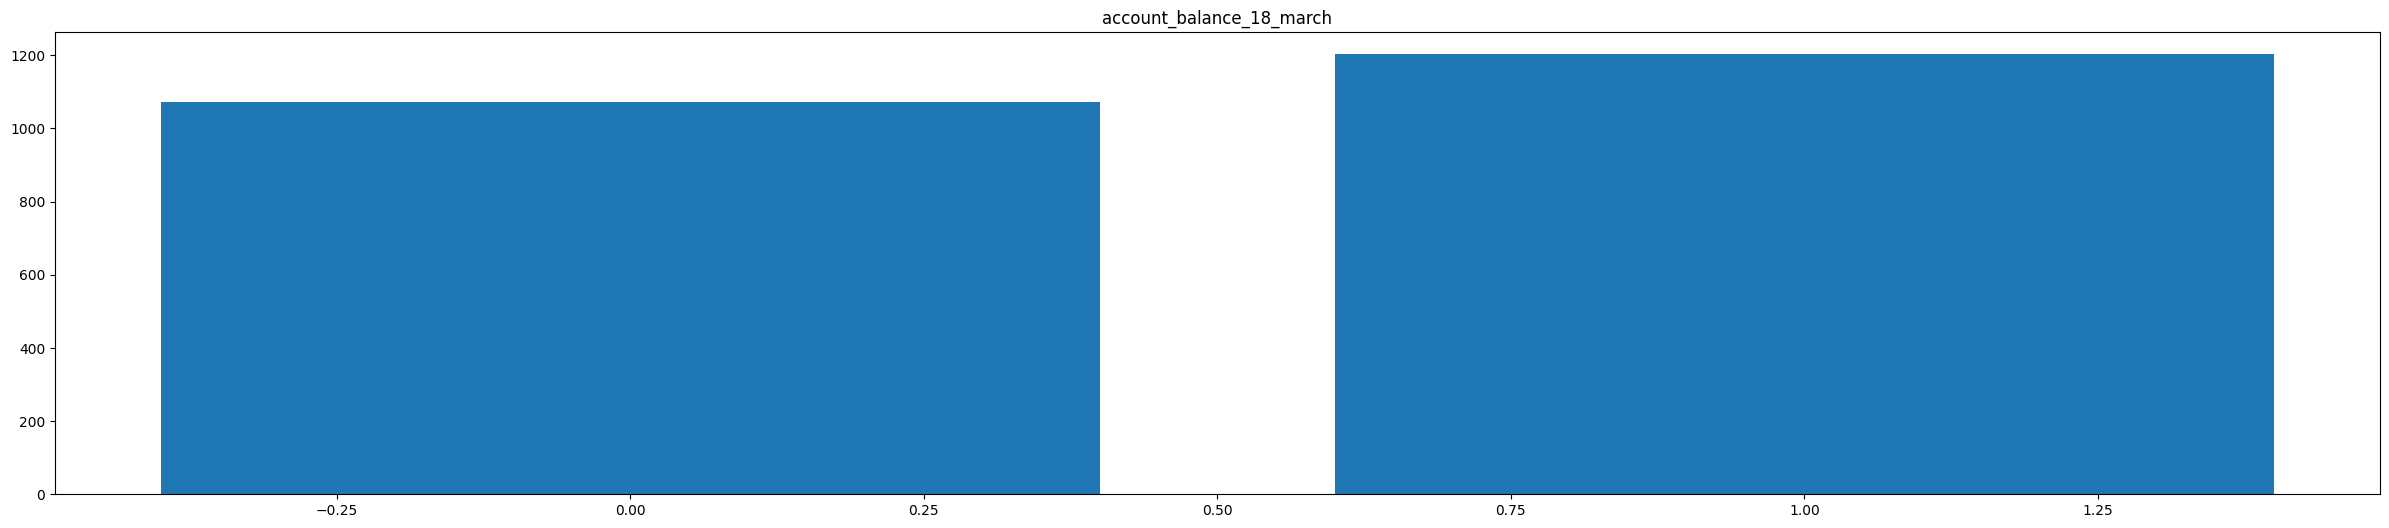

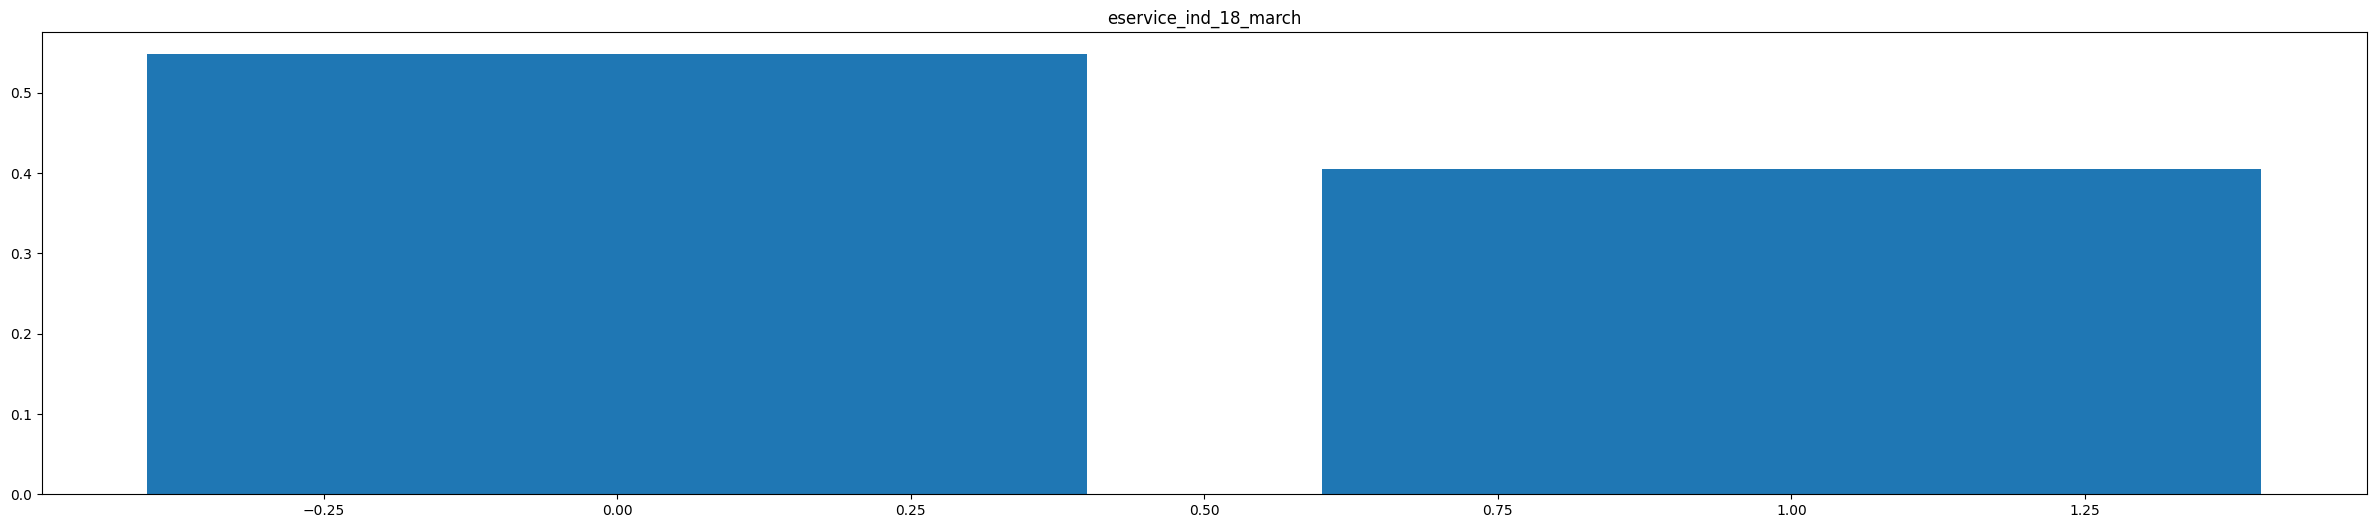

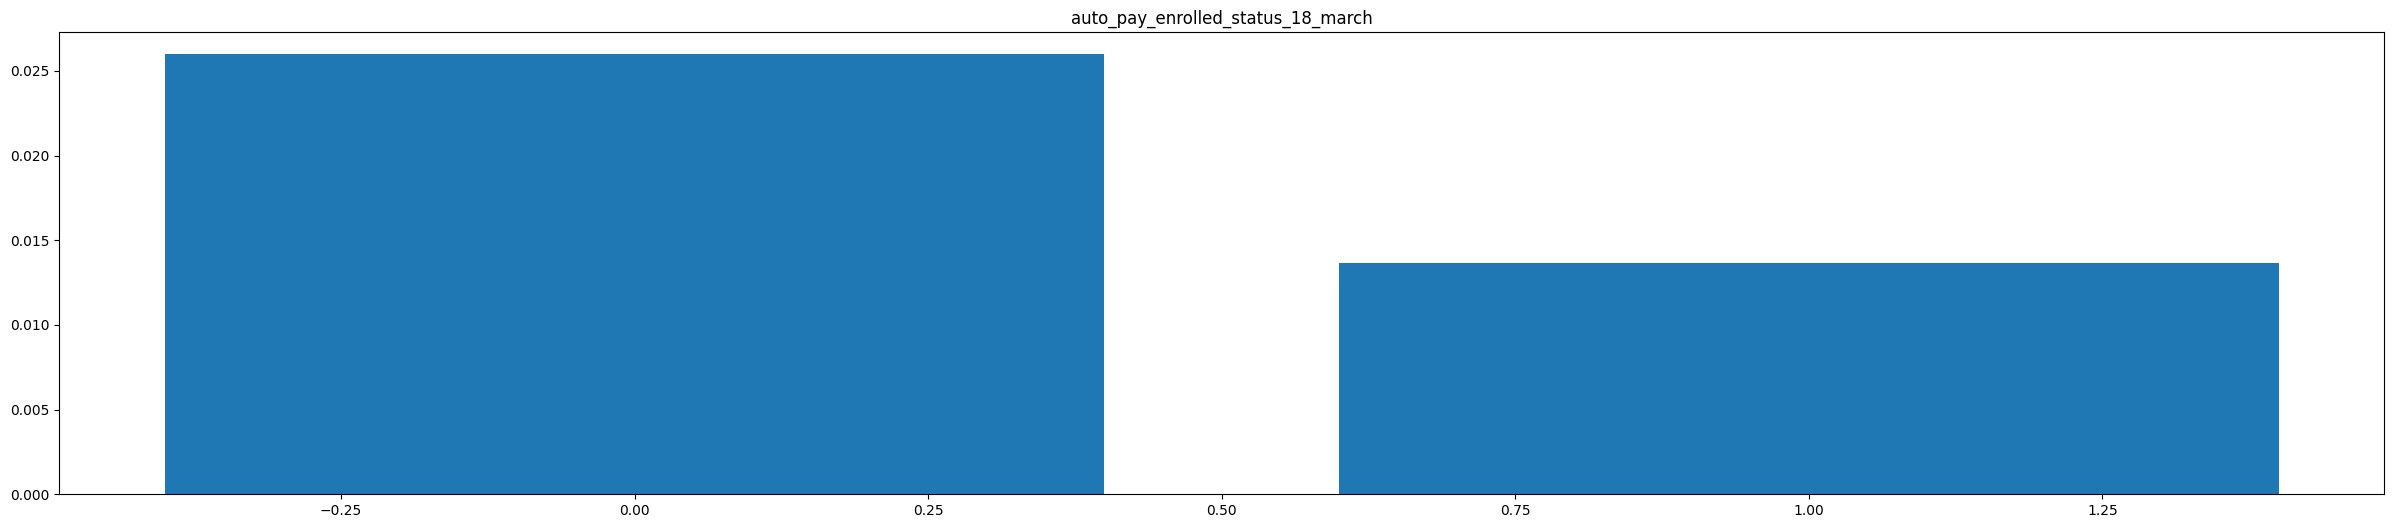

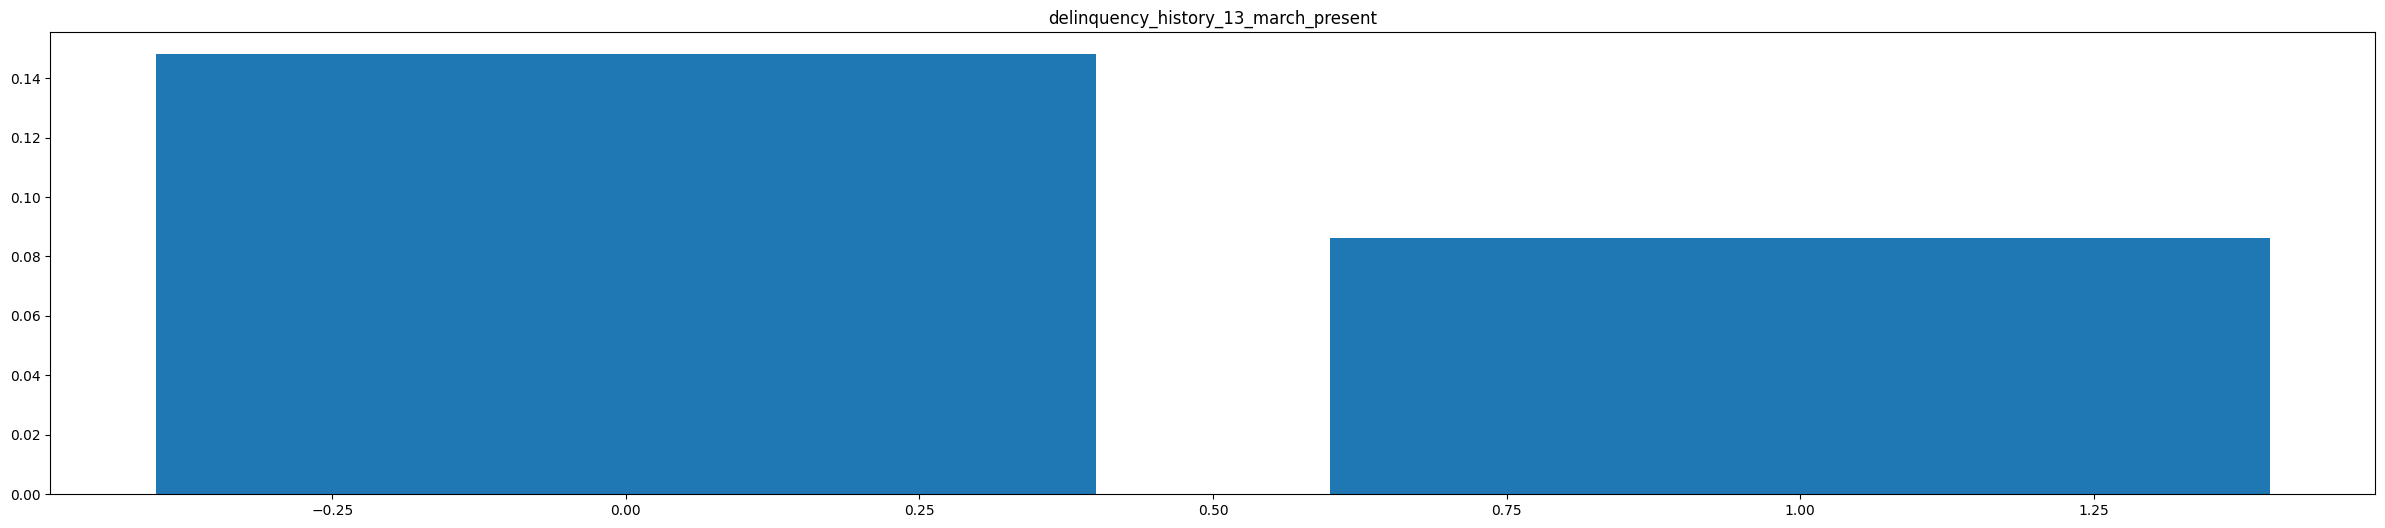

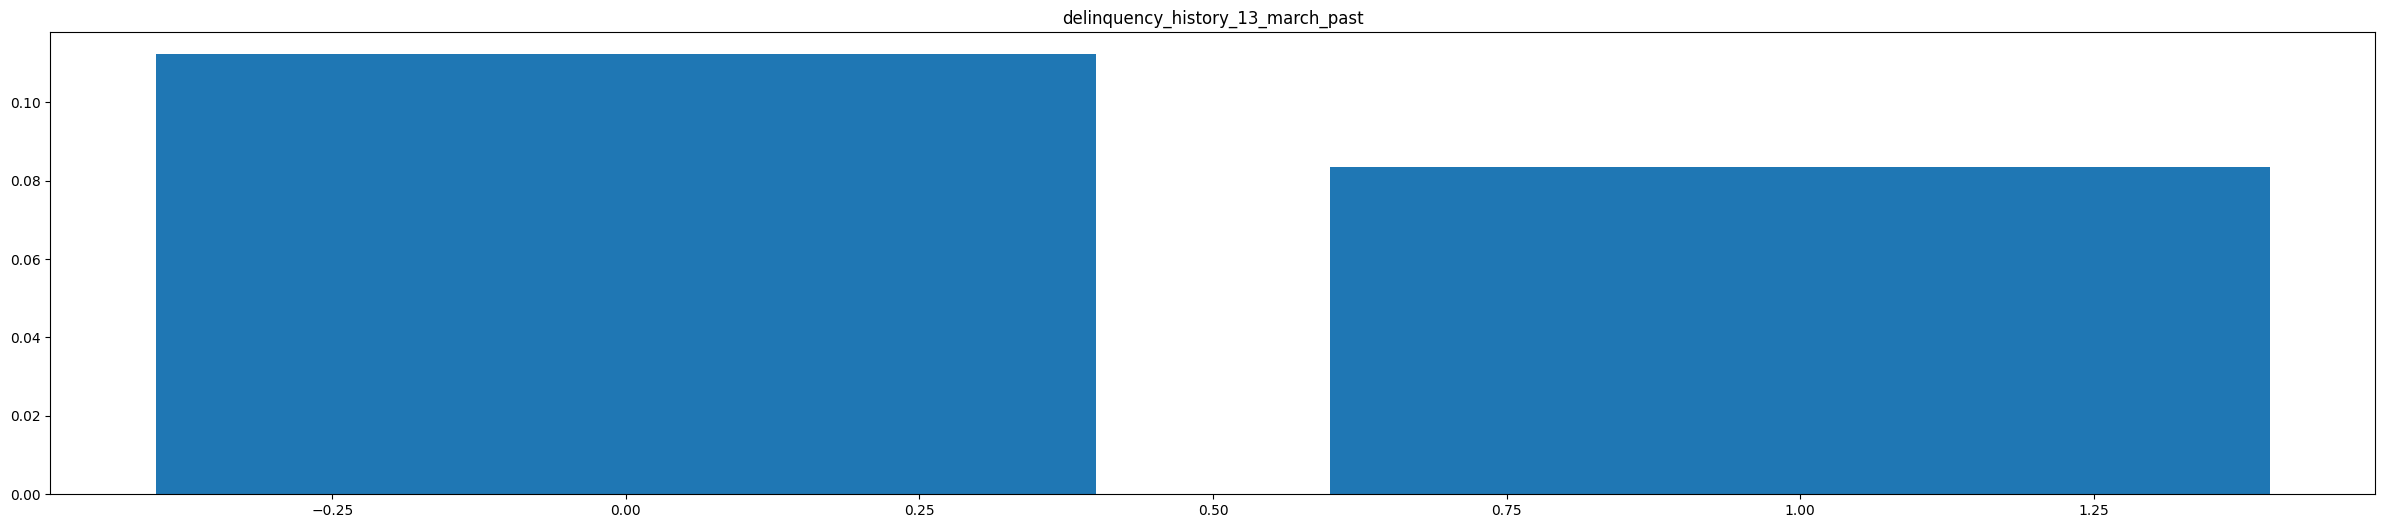

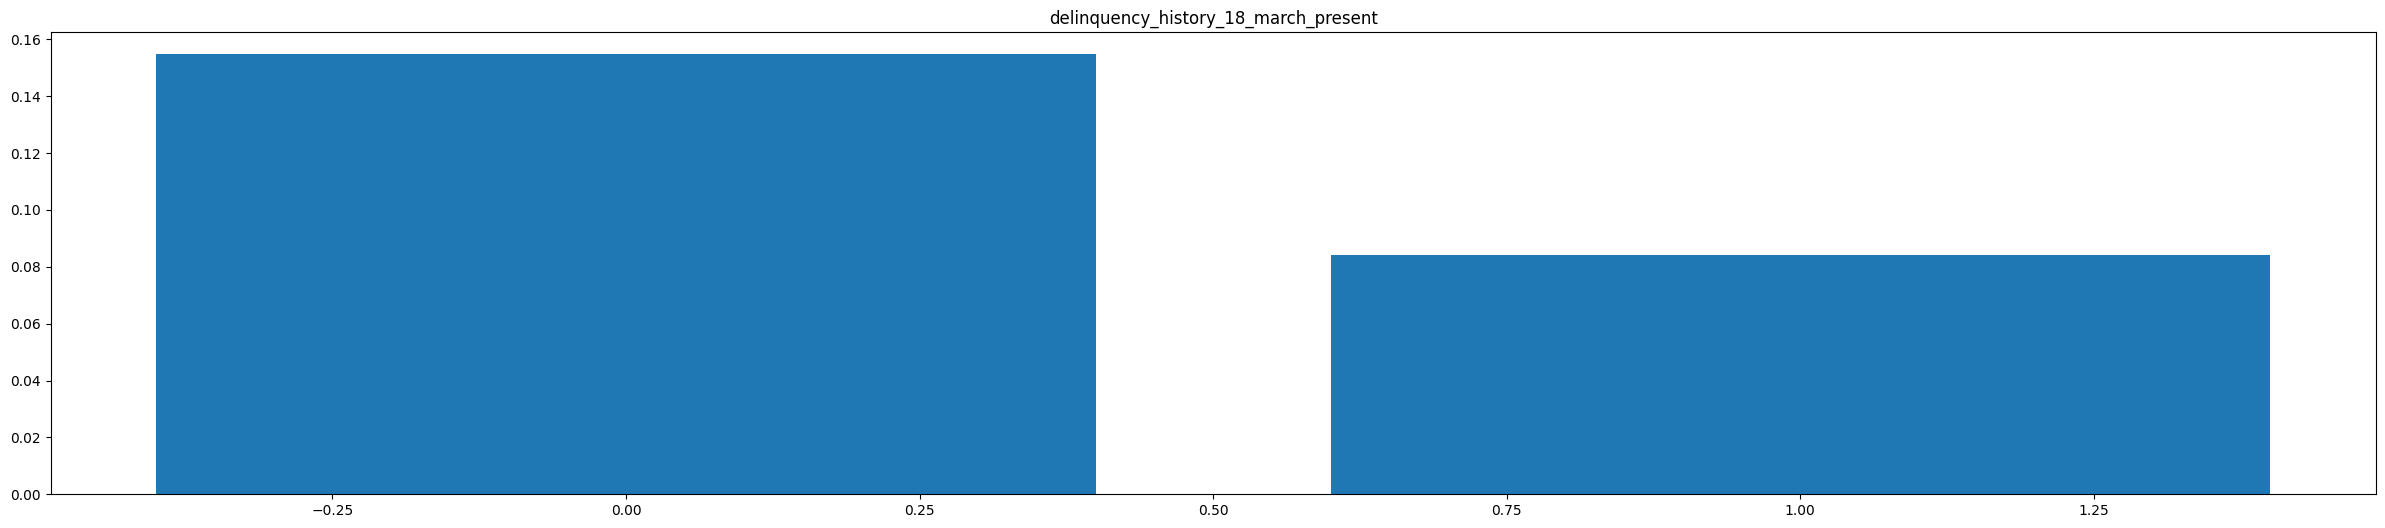

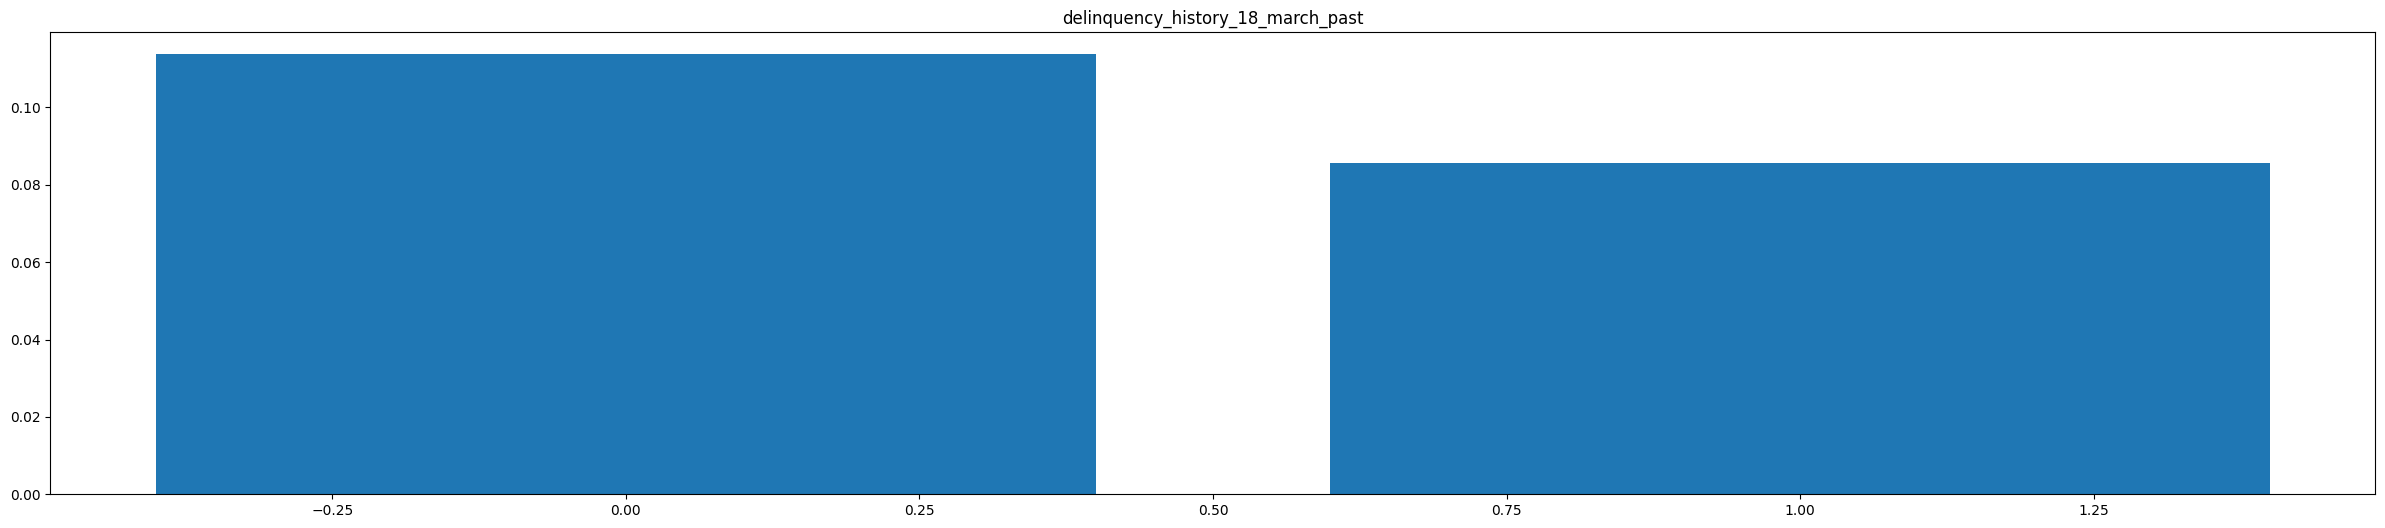

In [7]:
# indices = [f"{index[0]}, {index[1]}" for index in agg_mean.index]
indices = agg_mean.index
for col in agg_mean.columns:
    plt.figure( figsize=(30, 6))
    plt.title(col)
    plt.bar(indices, agg_mean[col])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [24]:
reason_encoder = LabelEncoder()
encoded_call_codes = reason_encoder.fit_transform(df["reason"])
df["reason"] = encoded_call_codes

In [25]:
external_status_encoder = LabelEncoder()
encoded_status_codes = external_status_encoder.fit_transform(df["account_status_18_march"])
df["account_status_18_march"] = encoded_status_codes
df["account_status_13_march"] = encoded_status_codes

In [26]:
ebill_encoder = LabelEncoder()
encoded_ebill_status = ebill_encoder.fit_transform(df["ebill_enrolled_status_18_march"])
df["ebill_enrolled_status_18_march"] = encoded_ebill_status
df["ebill_enrolled_status_13_march"] = encoded_ebill_status



In [27]:
df = df.drop(["timestamp_call_key", "retailer_code", "account_open_date_13_march", "account_open_date_18_march", "mos"], axis=1)
X = df.drop('resolved', axis=1)
y = df['resolved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [32]:
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
0,reason,0.294187
9,account_balance_18_march,0.268352
2,account_balance_13_march,0.263033
8,no_of_accounts_with_syf_18_march,0.033360
1,no_of_accounts_with_syf_13_march,0.033352
3,account_status_13_march,0.026665
10,account_status_18_march,0.022189
6,ebill_enrolled_status_13_march,0.008259
4,card_activation_status_13_march,0.008103
12,eservice_ind_18_march,0.007279


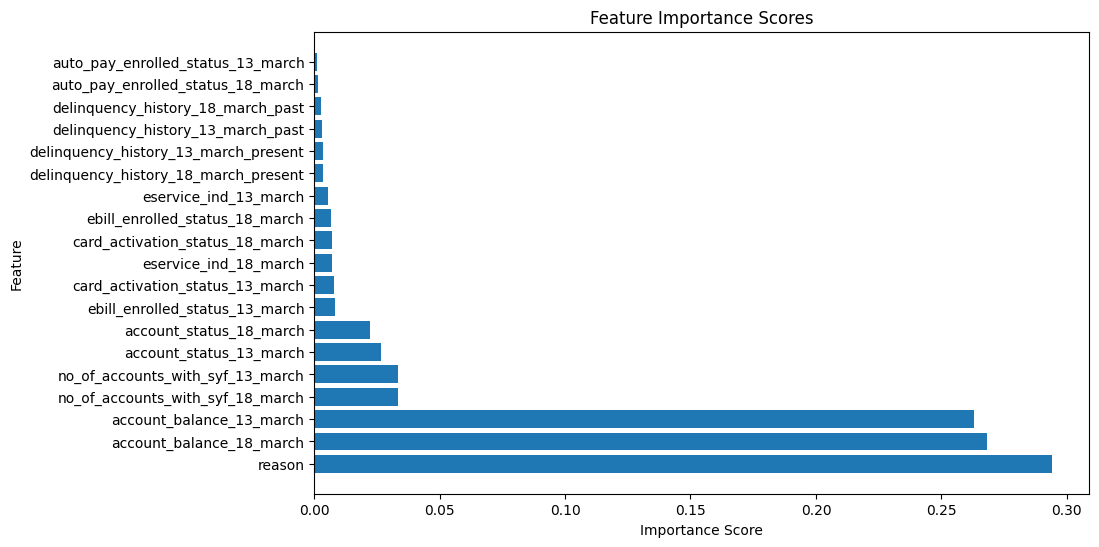

In [33]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.show()